In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


pd.set_option('display.max_columns', None)

try:
    df = pd.read_csv('../data/raw/data.csv') 
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")

Data loaded successfully.


In [ ]:
print(f"Shape of the dataset: {df.shape}")
print("-" * 30)
print("\nFirst 5 rows:")
display(df.head())

print("-" * 30)
print("\nData Info (Types and Non-Null Counts):")
df.info()

df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

Shape of the dataset: (95662, 16)
------------------------------

First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


------------------------------

Data Info (Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14 

In [ ]:
print("Summary Statistics for Numerical Columns:")
display(df.describe())

print("\nSummary Statistics for Categorical Columns:")
display(df.describe(include=['object']))

Summary Statistics for Numerical Columns:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Summary Statistics for Categorical Columns:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935


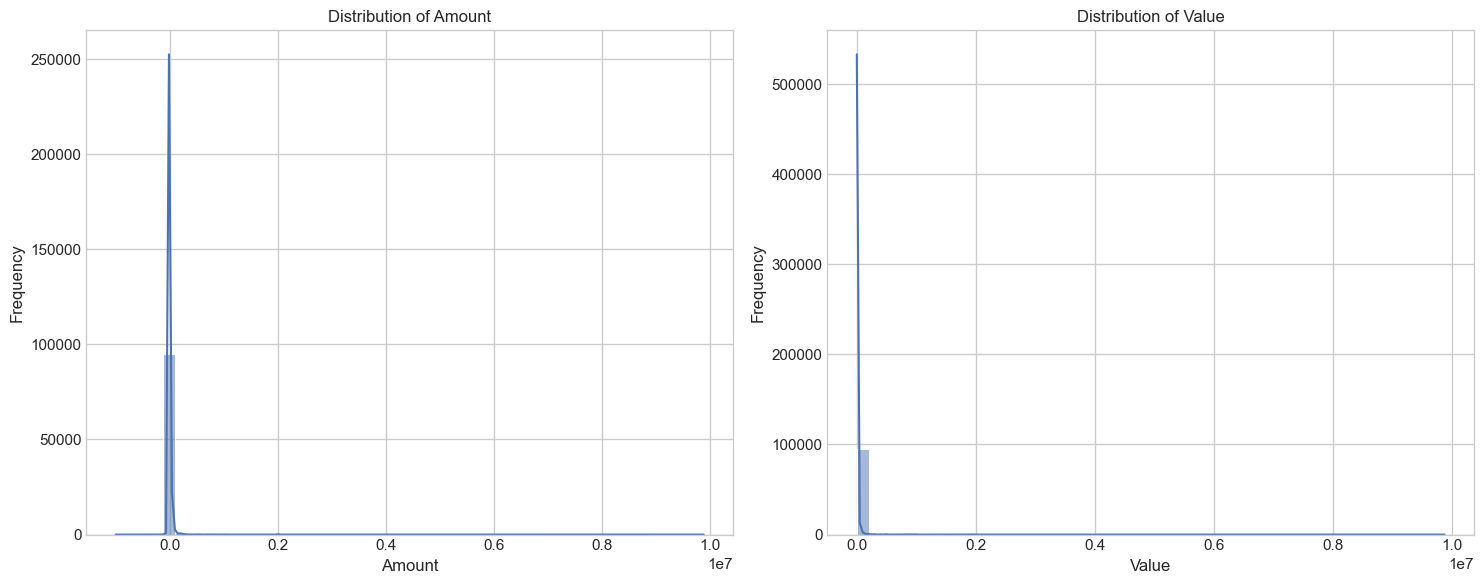

In [ ]:
numerical_cols = ['Amount', 'Value']

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], bins=50, kde=True, log_scale=False)  # type: ignore
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_4687/3674043399.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_4687/3674043399.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_4687/3674043399.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')
/var/fo

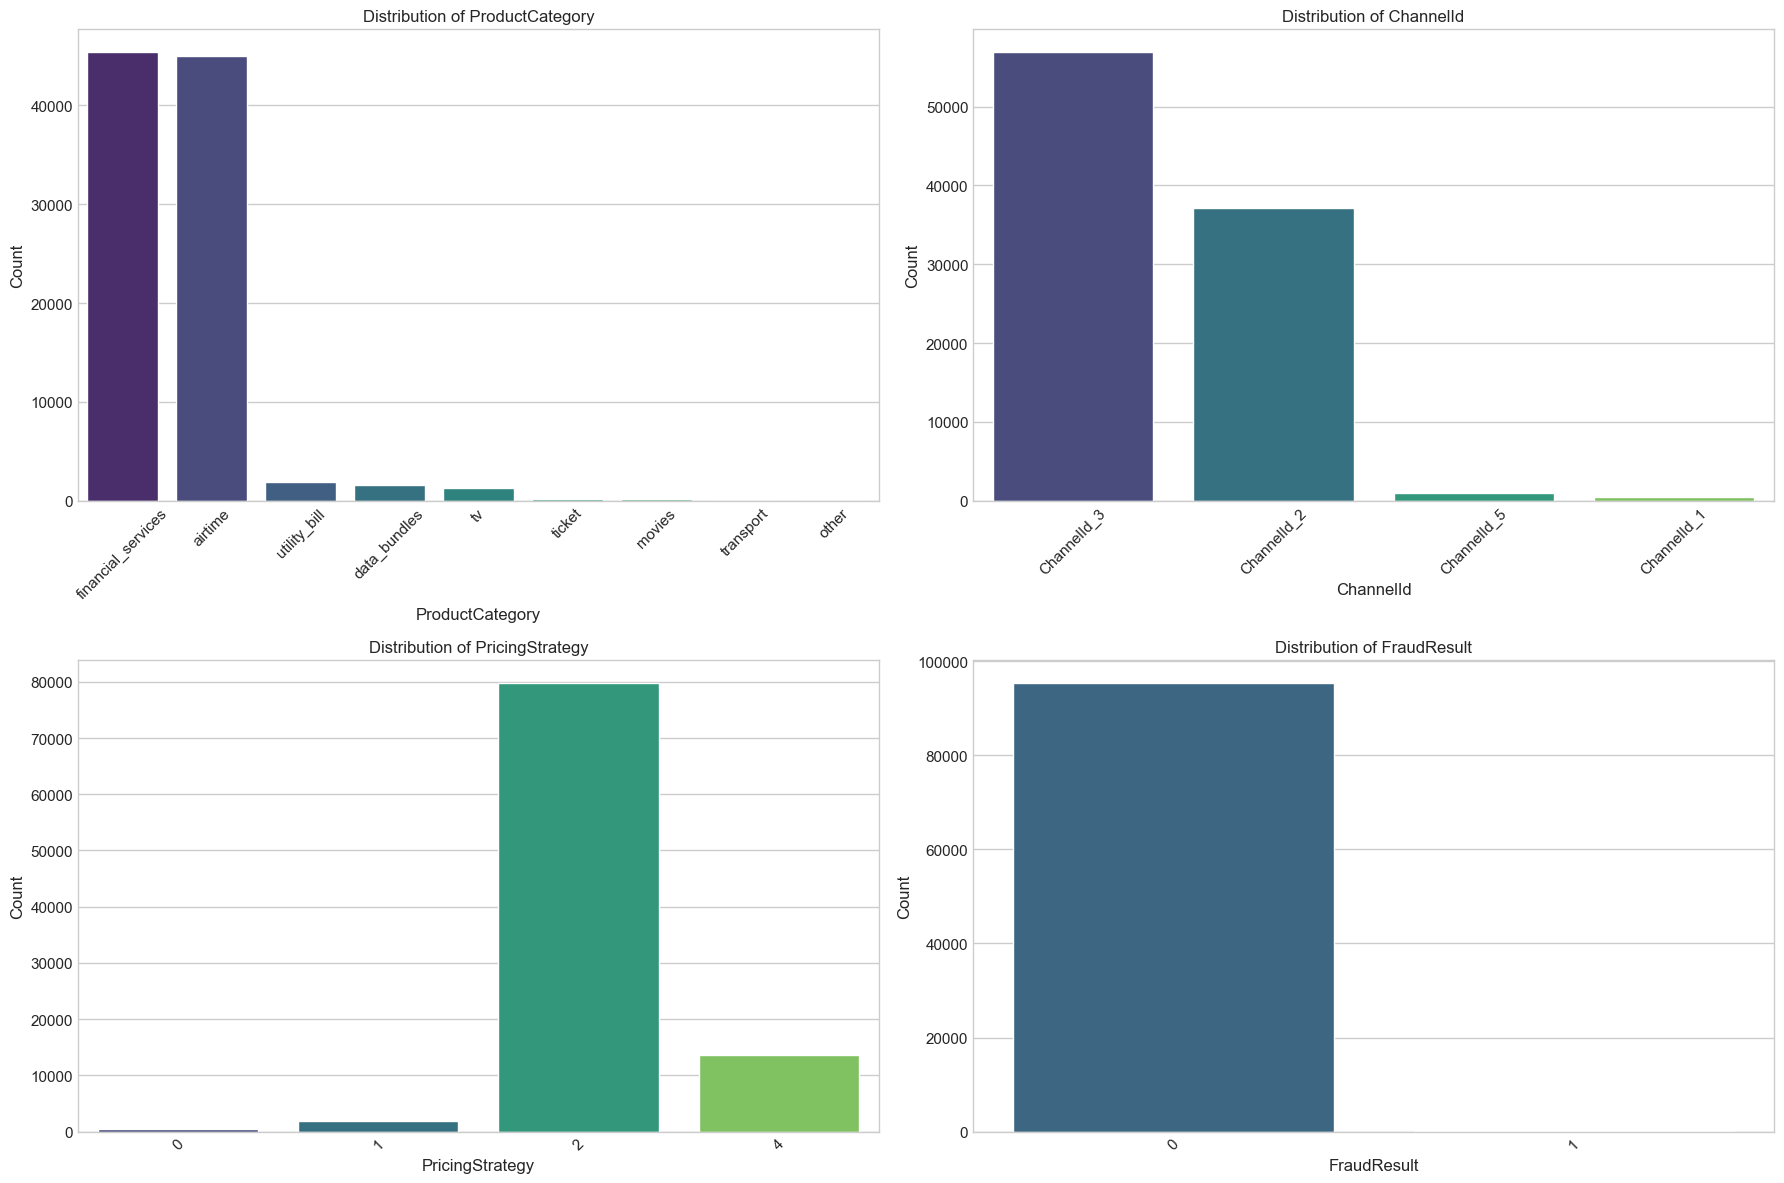

In [ ]:

categorical_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)

    counts = df[col].value_counts()
    

    if len(counts) > 10:
        counts = counts.head(10)
        title_suffix = " (Top 10)"
    else:
        title_suffix = ""
        
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {col}{title_suffix}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

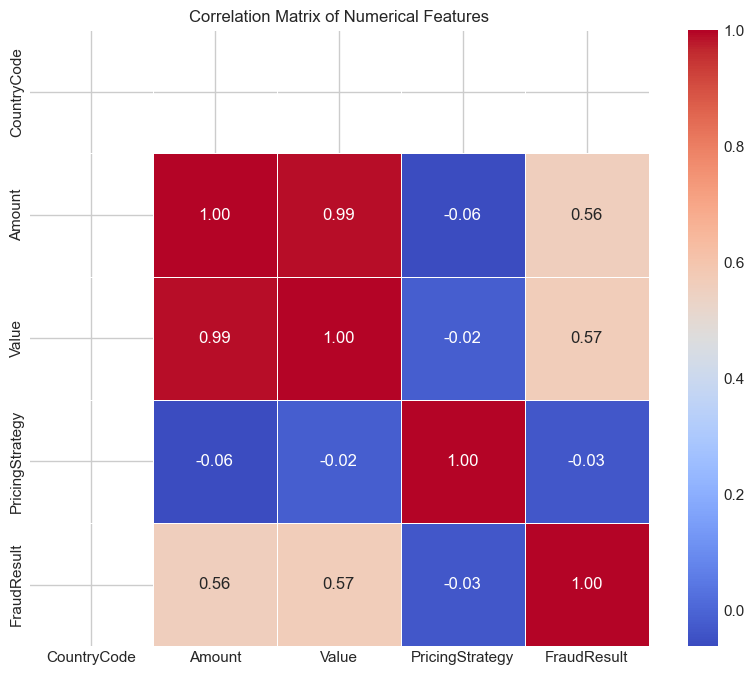

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

if not missing_df.empty:
    print("Columns with missing values:")
    display(missing_df)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Percentage'], palette='Reds_r')
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Percentage (%)')
    plt.show()
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


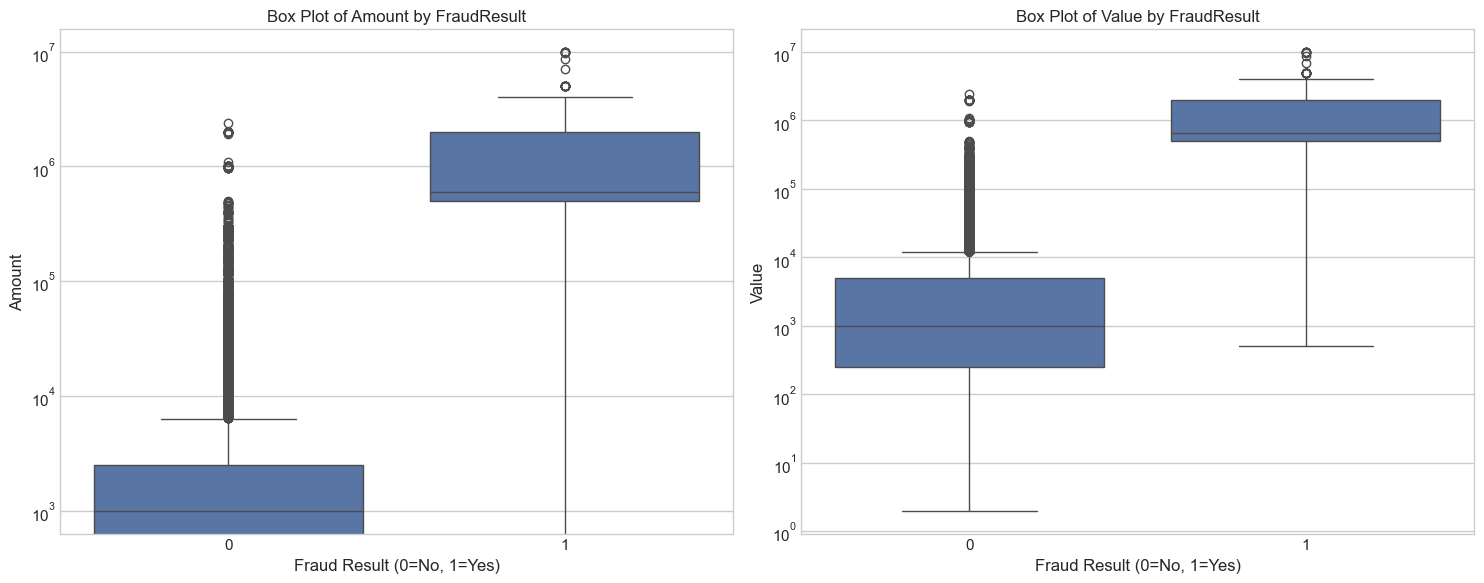

In [ ]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(['Amount', 'Value'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], x=df['FraudResult'].astype(str))
    plt.title(f'Box Plot of {col} by FraudResult')
    plt.yscale('log')
    plt.xlabel('Fraud Result (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

EDA Summary & Insights

1. Data Structure & Quality
*   Missing Values: [Note if there are any missing values. If none, state that the data is clean.]
*   Data Types: [Note if Amount/Value are floats and IDs are strings. Mention the time range covered by TransactionStartTime.]

2. Distribution Analysis
*   Skewness: [Likely finding: The 'Amount' column is highly right-skewed, meaning most transactions are small, but there are a few massive whales.]
*   Categorical Balance:** [Likely finding: 'FraudResult' is highly imbalanced (mostly 0s, very few 1s). 'ProductCategory' likely has one or two dominant categories (e.g., airtime or financial services).]

### 3. Correlation & Patterns
*   Correlation: [Note if 'Amount' and 'Value' are perfectly correlated (1.0). If they are, you should drop one of them during feature engineering to avoid multicollinearity.]
*   Outliers: [Note if fraud transactions (FraudResult=1) tend to have significantly higher or lower transaction amounts compared to normal transactions.]
*   Hypothesis for Feature Engineering:** 
    1.  Extract Time Features:* Since we have `TransactionStartTime`, we should extract 'Hour of Day' to see if fraud happens at odd hours.
    2.  Pricing Strategy:* Does a specific `PricingStrategy` correlate with higher fraud rates?